In [53]:
import numpy as np
import arepo
import pickle
import matplotlib.pyplot as plt

In [13]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [16]:
sim_list = ['Nbody', # 0
            'fgGSE0.5_fgMW0.5', # 1
           ]

snap_basepath = basepath + 'runs/'

def read_snap(idx, sim_idx, lvl='lvl4', parttype=[0], fields=['Coordinates', 'Masses', 'Velocities', 'ParticleIDs', 'Potential'],
              basepath = basepath):
    fname = snap_basepath + sim_list[sim_idx] + '/' + lvl + '/output'
    
    IDs = pickle.load(open(basepath + 'ics/' + sim_list[sim_idx] + '/' + lvl + '/IDs.p', 'rb'))
    
    return arepo.Snapshot(fname, idx, parttype=parttype, fields=fields, combineFiles=True), IDs

In [28]:
sn0, IDs = read_snap(0, 1, parttype=None, fields=None)
in_MW = np.logical_and(sn0.part2.id >= IDs['MW'][2][0], sn0.part2.id <= IDs['MW'][2][1])
in_GSE = np.logical_and(sn0.part2.id >= IDs['GSE'][2][0], sn0.part2.id <= IDs['GSE'][2][1])

In [29]:
def get_COM(pos, vel, rmin=1, rmax=20, rfac=0.9):
    COM = np.mean(pos, axis=0)
    r = np.linalg.norm(pos-COM, axis=1)
    
    rcut = rmax
    while rcut > rmin:
        COM = np.mean(pos[r<rcut], axis=0)
        r = np.linalg.norm(pos-COM, axis=1)
        rcut *= rfac
    
    COMV = np.mean(vel[r<rcut], axis=0)
    
    return COM, COMV

In [30]:
MW_pos = sn0.part2.pos.value[in_MW]
MW_vel = sn0.part2.vel.value[in_MW]

GSE_pos = sn0.part2.pos.value[in_GSE]
GSE_vel = sn0.part2.vel.value[in_GSE]

In [32]:
MW_COM, MW_COMV = get_COM(MW_pos, MW_vel)
print(MW_COM, MW_COMV)

GSE_COM, GSE_COMV = get_COM(GSE_pos, GSE_vel)
print(GSE_COM, GSE_COMV)

[199.99789078 200.00394858 199.99859732] [-1.0329416  -0.08861995  0.54572827]
[ 75.3741768  200.00158034 233.4044706 ] [ 95.77688   46.266804 -71.60523 ]


## COM of all snaps

In [47]:
COM = np.load(basepath+'/anlys/COM/COM_fgGSE0.5_fgMW0.5-lvl4.npy', allow_pickle=True).item()

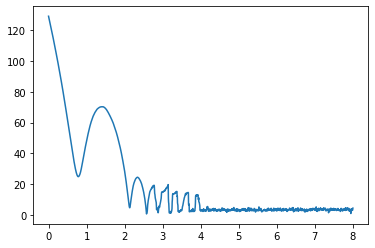

In [54]:
rdiff = np.linalg.norm(COM['MW_COM'] - COM['GSE_COM'], axis=1)
plt.plot(COM['Time'], rdiff)

In [57]:
COM['Tot_COM'].shape[0]

1601